In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
fashion_train_df=pd.read_csv(r'C:\\Users\\Abhijeet\\OneDrive\\Documents\\fashion-mnist_train.csv')

In [4]:
fashion_test_df=pd.read_csv(r'C:\\Users\\Abhijeet\\OneDrive\\Documents\\fashion-mnist_test.csv')

In [5]:
fashion_train_df.shape

(60000, 785)

In [6]:
fashion_test_df.shape

(10000, 785)

In [7]:
fashion_train_df.head(5)

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
fashion_train_df.tail(5)

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
59995,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59996,1,0,0,0,0,0,0,0,0,0,...,73,0,0,0,0,0,0,0,0,0
59997,8,0,0,0,0,0,0,0,0,0,...,160,162,163,135,94,0,0,0,0,0
59998,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59999,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
training = np.array(fashion_train_df , dtype ='float32')

In [10]:
testing = np.array(fashion_test_df , dtype ='float32')

1.0

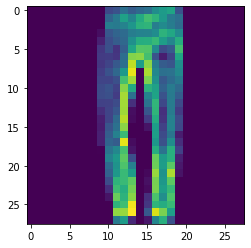

In [11]:
import random
i=random.randint(1,60000)
plt.imshow(training[i, 1:].reshape(28,28))
label = training[i,0]
label

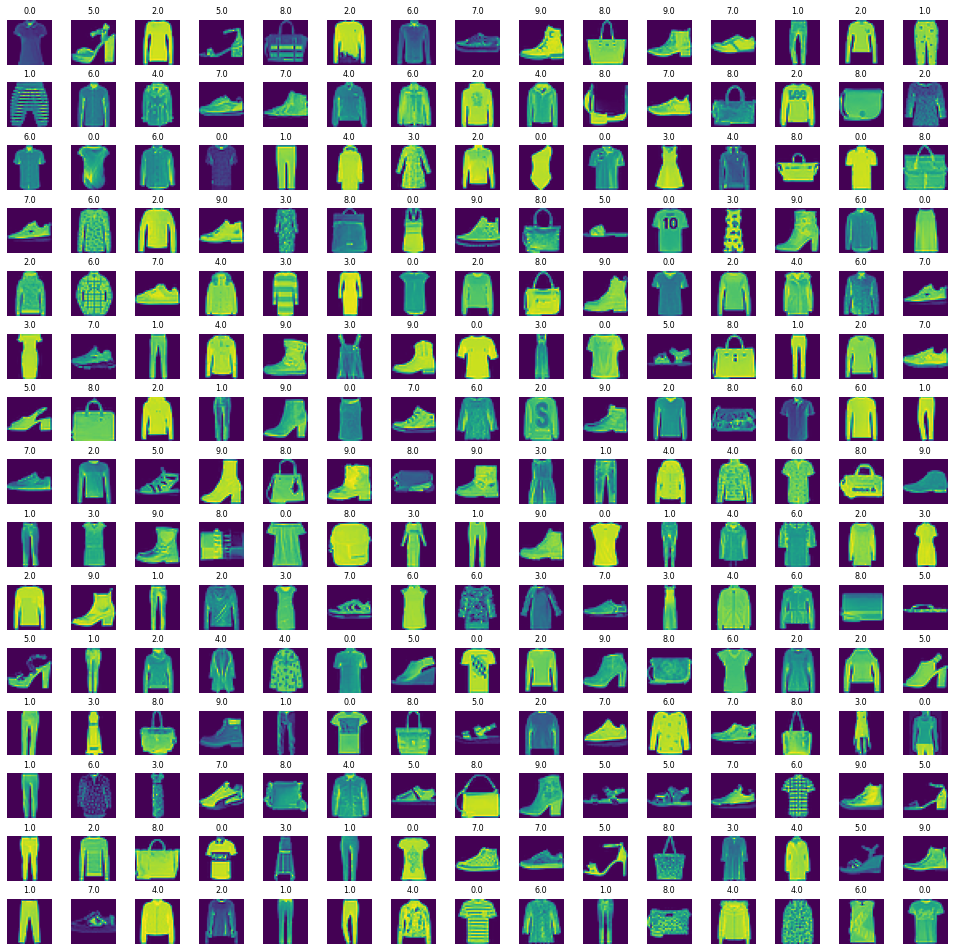

In [12]:
W_grid = 15
L_grid = 15


fig ,axes = plt.subplots(L_grid,W_grid ,figsize = (17,17))

axes = axes.ravel() # flatten the 15*15  matrix

n_training = len(training)

for i in np.arange(0,W_grid*L_grid):
    index=np.random.randint(0,n_training)
    axes[i].imshow(training[index,1:].reshape((28,28)) )
    axes[i].set_title(training[index,0] , fontsize= 8)
    axes[i].axis('off')

plt.subplots_adjust(hspace=0.4)

In [13]:
X_train = training[:,1:]/255
y_train = training[:,0]

In [14]:
X_test = testing[:,1:]/255
y_test = testing[:,0]

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
X_train , X_validate, y_train, y_validate = train_test_split(X_train,y_train,test_size = 0.2,random_state=12345)

In [17]:
print(X_train.shape)
print(X_validate.shape)
print(y_train.shape)
print(y_validate.shape)

(48000, 784)
(12000, 784)
(48000,)
(12000,)


In [18]:
X_train.shape[0]

48000

In [19]:
X_train = X_train.reshape(X_train.shape[0], *(28,28,1))
X_test = X_test.reshape(X_test.shape[0], *(28,28,1))
X_validate = X_validate.reshape(X_validate.shape[0], *(28,28,1))

In [20]:
print(X_train.shape)
print(X_test.shape)
print(X_validate.shape)

(48000, 28, 28, 1)
(10000, 28, 28, 1)
(12000, 28, 28, 1)


In [21]:
X_train[0] -- 28*28

array([[[784.     ],
        [784.     ],
        [784.     ],
        [784.     ],
        [784.     ],
        [784.     ],
        [784.0039 ],
        [784.0039 ],
        [784.     ],
        [784.     ],
        [784.     ],
        [784.5765 ],
        [784.1804 ],
        [784.4902 ],
        [784.5647 ],
        [784.4274 ],
        [784.3333 ],
        [784.     ],
        [784.     ],
        [784.     ],
        [784.0039 ],
        [784.     ],
        [784.     ],
        [784.     ],
        [784.     ],
        [784.     ],
        [784.     ],
        [784.     ]],

       [[784.     ],
        [784.     ],
        [784.     ],
        [784.     ],
        [784.     ],
        [784.     ],
        [784.     ],
        [784.     ],
        [784.     ],
        [784.102  ],
        [784.2157 ],
        [784.8863 ],
        [784.8    ],
        [784.6353 ],
        [784.6431 ],
        [784.82745],
        [784.97253],
        [784.03925],
        [784.     ],
        [78

In [22]:
import keras

In [23]:
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D , Dense,Flatten,Dropout
from tensorflow.keras.optimizers import Adam
from keras.callbacks import TensorBoard

In [24]:
cnn_model = Sequential()

In [25]:
cnn_model.add(Conv2D(32,3,3 ,input_shape=(28,28,1), activation ='relu'))

In [26]:
cnn_model.add(MaxPooling2D(pool_size=(2,2)))

In [27]:
cnn_model.add(Flatten())

In [28]:
cnn_model.add(Dense(units=32, activation = 'relu'))

In [29]:
cnn_model.add(Dense(units=10, activation = 'sigmoid'))

In [30]:
cnn_model.compile(loss='sparse_categorical_crossentropy',optimizer=Adam(lr = 0.001),metrics=['accuracy'])

C:\Users\Abhijeet\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [31]:
epoch=50

In [32]:
cnn_model.fit(X_train,y_train,batch_size =512,epochs=epoch,verbose = 1,validation_data=(X_validate,y_validate))

Epoch 1/50
94/94 [==============================] - 3s 22ms/step - loss: 1.4033 - accuracy: 0.5540 - val_loss: 0.7922 - val_accuracy: 0.7223
Epoch 2/50
94/94 [==============================] - 2s 17ms/step - loss: 0.6986 - accuracy: 0.7461 - val_loss: 0.6370 - val_accuracy: 0.7687
Epoch 3/50
94/94 [==============================] - 1s 15ms/step - loss: 0.5979 - accuracy: 0.7821 - val_loss: 0.5597 - val_accuracy: 0.7981
Epoch 4/50
94/94 [==============================] - 1s 14ms/step - loss: 0.5435 - accuracy: 0.8035 - val_loss: 0.5244 - val_accuracy: 0.8128
Epoch 5/50
94/94 [==============================] - 2s 17ms/step - loss: 0.5083 - accuracy: 0.8183 - val_loss: 0.4974 - val_accuracy: 0.8216
Epoch 6/50
94/94 [==============================] - 2s 20ms/step - loss: 0.4853 - accuracy: 0.8253 - val_loss: 0.4824 - val_accuracy: 0.8269
Epoch 7/50
94/94 [==============================] - 1s 15ms/step - loss: 0.4680 - accuracy: 0.8302 - val_loss: 0.4663 - val_accuracy: 0.8343
Epoch 8/50
94

Evaluating the model.

In [33]:
evaluation = cnn_model.evaluate(X_test,y_test)
print('Test Accuracy : {:.3f}'.format(evaluation[1])  )

313/313 [==============================] - 0s 1ms/step - loss: 0.3552 - accuracy: 0.8708
Test Accuracy : 0.871


In [34]:
#predicted_classes = cnn_model.predict_classes(X_test)
y_predict = np.argmax(cnn_model.predict(X_test), axis=1)

In [35]:
#predictions = (cnn_model.predict(X_test) > 0.5).astype("int64")

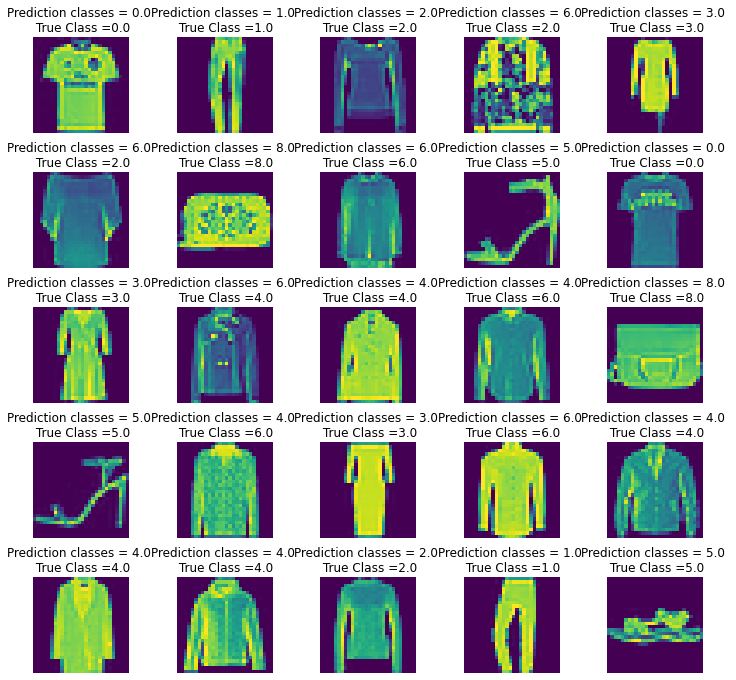

In [36]:
l=5
w=5


fig , axes =plt.subplots(l,w,figsize = (12,12))
axes= axes.ravel()

for i in np.arange(0, l * w):
    axes[i].imshow(X_test[i].reshape(28,28))
    axes[i].set_title("Prediction classes = {:0.1f} \n True Class ={:0.1f}".format(y_predict[i] ,y_test[i]))
    axes[i].axis('off')

plt.subplots_adjust(wspace=0.5)

<AxesSubplot:>

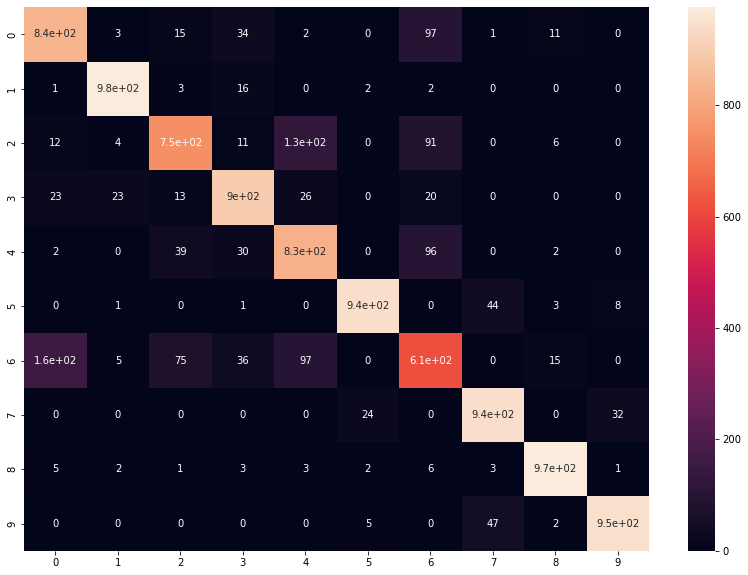

In [37]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_predict)
plt.figure(figsize =(14,10))
sns.heatmap(cm , annot = True) 

In [38]:
from  sklearn.metrics import classification_report
num_classes = 10

target_names = ["Class {} ".format(i) for i in range (num_classes)]

print(classification_report(y_test,y_predict,target_names = target_names))

              precision    recall  f1-score   support

    Class 0        0.81      0.84      0.82      1000
    Class 1        0.96      0.98      0.97      1000
    Class 2        0.84      0.75      0.79      1000
    Class 3        0.87      0.90      0.88      1000
    Class 4        0.76      0.83      0.80      1000
    Class 5        0.97      0.94      0.95      1000
    Class 6        0.66      0.61      0.64      1000
    Class 7        0.91      0.94      0.93      1000
    Class 8        0.96      0.97      0.97      1000
    Class 9        0.96      0.95      0.95      1000

    accuracy                           0.87     10000
   macro avg       0.87      0.87      0.87     10000
weighted avg       0.87      0.87      0.87     10000

